### Atividade (1.0 pt): Visualização de casos de COVID-19 no Piauí (equipe 5 integrantes)

<dl>
<dt>Apresentar um jupyter notebook atendendo os seguintes itens: </dt>
    <dd>1. Filtrar os dados para selecionar apenas aqueles referentes ao estado do Piauí. Se uma cidade possui mais de 1 amostra, selecionar aquela mais recente (nota: as datas estão em ordem decrescente);</dd>
    <dd>2. Plotar um mapa com a localização e número de casos;</dd>
    <dd>3. Indicar o número de amostras, atributos e dados faltantes (se existir) do conjunto de dados;</dd>
    <dd>4. Apresentar as estatísticas descritivas dos atributos não categóricos;</dd>
    <dd>5. Apresentar os histogramas dos atributos não categóricos;</dd>
    <dd>6. Capturar as latitudes e longitudes para cada 1 dos municípios presentes na base de dados e adicionar as colunas latitude e longitude nos dados;</dd>
    <dd>7. Apresentar um gráfico da latitude x longitude, onde cada amostra será representada por um círculo e quanto maior o valor do campo estimated_population, maior o raio do círculo que representa aquela amostra. Já a cor representa a taxa de mortalidade (death_rate), quão maior esse índice, mais próximo do vermelho;</dd>
    <dd>8. Calcular a matriz de correlação;</dd>
    <dd>9. Verificar a correlação entre o atributo death_rate e os demais atributos não categóricos;</dd>
</dl>

## Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import os
import csv
from urllib.parse import urlencode
from dotenv import load_dotenv as loadEnv
from mpl_toolkits.basemap import Basemap


## Utilizando API da Brasil.IO

In [2]:
loadEnv()
BRASILIO_API_TOKEN = os.getenv('BRASILIO_API_TOKEN')

base_url = "https://api.brasil.io/v1/dataset/covid19/caso/data"

header = {
    "User-Agent": "python-urllib/brasilio-client-0.1.0",
    "Authorization": f"Token {BRASILIO_API_TOKEN}"
}

filters = {"state": "PI", "is_last": True}
if filters:
    request = base_url + "?" + urlencode(filters)

response = requests.get(request, headers=header)
responseData = response.json()['results']


## Transformando resposta da API em arquivo CSV

In [3]:
def saveOnCSV(dataset_path, dataset_name):
    file = os.path.join(dataset_path, dataset_name)

    with open(file, 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = [
            'city',
            'city_ibge_code',
            'confirmed',
            'confirmed_per_100k_inhabitants',
            'date',
            'death_rate',
            'deaths',
            'estimated_population',
            'estimated_population_2019',
            'is_last',
            'order_for_place',
            'place_type',
            'state'
        ]
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for i in responseData:
            writer.writerow(i)


In [4]:
# DATASET_PATH = 'D:\\MyProjects\\GItHub\\SI\\AT01'
DATASET_PATH = os.path.join(os.getcwd(), 'datasets')
DATASET_NAME = 'casos_atualizados.csv'

saveOnCSV(DATASET_PATH, DATASET_NAME)


## Carregando dados completos do dataset

In [5]:
# DATASET_PATH = 'D:\\MyProjects\\GItHub\\SI\\AT01'
DATASET_PATH = os.path.join(os.getcwd(), 'datasets')
DATASET_NAME = 'caso.csv'


In [6]:
def load_data(dataset_path=DATASET_PATH, dataset_name=DATASET_NAME):
    csv_path = os.path.join(dataset_path, dataset_name)
    return pd.read_csv(csv_path)


In [7]:
dataset = load_data(DATASET_PATH,DATASET_NAME)


In [8]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800004 entries, 0 to 2800003
Data columns (total 13 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   date                            object 
 1   state                           object 
 2   city                            object 
 3   place_type                      object 
 4   confirmed                       int64  
 5   deaths                          int64  
 6   order_for_place                 int64  
 7   is_last                         bool   
 8   estimated_population_2019       float64
 9   estimated_population            float64
 10  city_ibge_code                  float64
 11  confirmed_per_100k_inhabitants  float64
 12  death_rate                      float64
dtypes: bool(1), float64(5), int64(3), object(4)
memory usage: 259.0+ MB


## Ponto #1
Filtrar dados pelo mais recentes e do estado do Piauí

In [9]:
dataPiaui = dataset[(dataset['is_last'] == True)&(dataset['state'] == 'PI')&(dataset['place_type'] == 'city')]


In [10]:
dataPiaui.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 2050053 to 2191261
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   date                            224 non-null    object 
 1   state                           224 non-null    object 
 2   city                            224 non-null    object 
 3   place_type                      224 non-null    object 
 4   confirmed                       224 non-null    int64  
 5   deaths                          224 non-null    int64  
 6   order_for_place                 224 non-null    int64  
 7   is_last                         224 non-null    bool   
 8   estimated_population_2019       224 non-null    float64
 9   estimated_population            224 non-null    float64
 10  city_ibge_code                  224 non-null    float64
 11  confirmed_per_100k_inhabitants  224 non-null    float64
 12  death_rate                

In [11]:
dataPiaui.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
2050053,2022-02-15,PI,Acauã,city,228,2,619,True,7084.0,7102.0,2200053.0,3210.36328,0.0088
2050672,2022-02-15,PI,Agricolândia,city,815,10,611,True,5139.0,5131.0,2200103.0,15883.84331,0.0123
2051283,2022-02-15,PI,Alagoinha do Piauí,city,402,13,625,True,7651.0,7665.0,2200251.0,5244.61840,0.0323
2051908,2022-02-15,PI,Alegrete do Piauí,city,553,9,607,True,4915.0,4918.0,2200277.0,11244.40830,0.0163
2052515,2022-02-15,PI,Alto Longá,city,822,15,641,True,14304.0,14339.0,2200301.0,5732.61734,0.0182


## Ponto #6

 Capturar as latitudes e longitudes para cada 1 dos municípios presentes na base de dados e adicionar as colunas latitude e longitude nos dados

In [12]:
latitudes = []
longitudes = []

for city in dataPiaui['city']:
    request = 'https://nominatim.openstreetmap.org/search?city='+city+'&state=Piaui&format=json'
    response = requests.get(request)
    response_data = response.json()[0]
    
    latitude = float(response_data["lat"])
    longitude = float(response_data["lon"])
    latitudes.append(latitude)
    longitudes.append(longitude)


In [13]:
len(latitudes)
len(longitudes)


224

In [14]:
dataPiaui['latitude'] = latitudes
dataPiaui['longitude'] = longitudes
# dataPiaui.assign(latitude = latitudes)
# dataPiaui.assign(longitude = longitudes)

# dataPiaui.info()


C:\Users\brpep\AppData\Local\Temp\ipykernel_11404\4141642312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataPiaui['latitude'] = latitudes
C:\Users\brpep\AppData\Local\Temp\ipykernel_11404\4141642312.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataPiaui['longitude'] = longitudes


In [15]:
dataPiaui.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 2050053 to 2191261
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   date                            224 non-null    object 
 1   state                           224 non-null    object 
 2   city                            224 non-null    object 
 3   place_type                      224 non-null    object 
 4   confirmed                       224 non-null    int64  
 5   deaths                          224 non-null    int64  
 6   order_for_place                 224 non-null    int64  
 7   is_last                         224 non-null    bool   
 8   estimated_population_2019       224 non-null    float64
 9   estimated_population            224 non-null    float64
 10  city_ibge_code                  224 non-null    float64
 11  confirmed_per_100k_inhabitants  224 non-null    float64
 12  death_rate                

## Ponto #2
Plotar um mapa com a localização e número de casos

In [16]:
#Função para plotar o mapa
def plotMap(lat1, lat2, lon1, lon2, xmap, ymap):
    plt.figure(figsize=(xmap, ymap))
    map = Basemap(projection='cyl',
    resolution='h',
    llcrnrlat=lat1,
    urcrnrlat=lat2,
    llcrnrlon=lon1,
    urcrnrlon=lon2
    )
    map.drawcoastlines()
    map.fillcontinents(color='palegoldenrod', lake_color='lightskyblue')
    map.drawmapboundary(fill_color='lightskyblue')
    map.drawstates(color='black')
    map.drawparallels(np.arange(lat1, lat2 + 0.5, 2), labels=[1, 0, 0, 0])
    map.drawmeridians(np.arange(lon1, lon2 + 0.5, 2), labels=[0, 0, 0, 1])
    return map


In [17]:
multiplot = 1
lat1 = dataPiaui['latitude'].min() - multiplot if dataPiaui['latitude'].min() < 0 else dataPiaui['latitude'].min() + multiplot
lat2 = dataPiaui['latitude'].max() + multiplot if dataPiaui['latitude'].max() < 0 else dataPiaui['latitude'].max() - multiplot
lon1 = dataPiaui['longitude'].min() - multiplot if dataPiaui['longitude'].min() < 0 else dataPiaui['longitude'].min() + multiplot
lon2 = dataPiaui['longitude'].max() + multiplot if dataPiaui['longitude'].max() < 0 else dataPiaui['longitude'].max() - multiplot

lat1, lat2 = round(lat1, 4), round(lat2, 4)
lon1, lon2 = round(lon1, 4), round(lon2, 4)

print(dataPiaui['latitude'].min(), dataPiaui['latitude'].max())
print(lat1, lat2)
print(dataPiaui['longitude'].min(), dataPiaui['longitude'].max())
print(lon1, lon2)

-10.8149125 -2.8520082
-11.8149 -1.852
-45.9199551 -40.6147253
-46.92 -39.6147


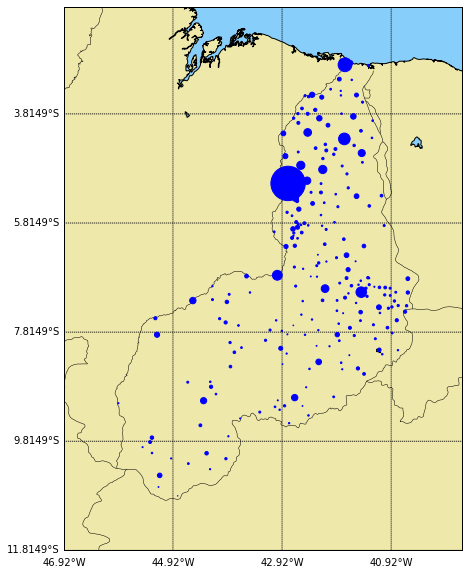

In [18]:
map = plotMap(lat1, lat2, lon1, lon2, 15, 10)
map.scatter(
    x=dataPiaui['longitude'].values,
    y=dataPiaui['latitude'].values,
    s = dataPiaui['confirmed']/100, c='blue',
    # alpha = 0.01,
    marker='o',
    zorder=6
    )


## Ponto #3

Indicar o número de amostras, atributos e dados faltantes (se existir) do conjunto de dados

In [19]:
dataPiaui.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 2050053 to 2191261
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   date                            224 non-null    object 
 1   state                           224 non-null    object 
 2   city                            224 non-null    object 
 3   place_type                      224 non-null    object 
 4   confirmed                       224 non-null    int64  
 5   deaths                          224 non-null    int64  
 6   order_for_place                 224 non-null    int64  
 7   is_last                         224 non-null    bool   
 8   estimated_population_2019       224 non-null    float64
 9   estimated_population            224 non-null    float64
 10  city_ibge_code                  224 non-null    float64
 11  confirmed_per_100k_inhabitants  224 non-null    float64
 12  death_rate                

## Ponto #4

Apresentar as estatísticas descritivas dos atributos não categóricos

In [20]:
dataPiaui.describe()

,confirmed,deaths,order_for_place,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,latitude,longitude
count,224.000000,224.000000,224.000000,224.000000,224.000000,2.240000e+02,224.000000,224.000000,224.000000,224.000000
mean,1604.995536,33.799107,633.339286,14612.620536,14649.464286,2.205694e+06,8485.333611,0.026325,-6.685971,-42.405314
std,8088.565295,184.563137,27.566000,58886.634217,59102.962350,3.333670e+03,4895.328509,0.023330,1.852397,1.103157
min,25.000000,1.000000,521.000000,1246.000000,1242.000000,2.200053e+06,724.427700,0.001800,-10.814913,-45.919955
25%,251.500000,5.000000,617.750000,4503.000000,4511.000000,2.202690e+06,4638.431965,0.013800,-7.862943,-42.816981
50%,479.000000,10.000000,635.000000,6246.500000,6250.500000,2.205548e+06,7539.150995,0.020750,-6.971350,-42.248402
75%,993.250000,19.000000,655.000000,10715.250000,10725.250000,2.208662e+06,11346.422683,0.030925,-5.360869,-41.646871
max,118155.000000,2709.000000,695.000000,864845.000000,868075.000000,2.211704e+06,27239.884390,0.152200,-2.852008,-40.614725


## Ponto #5

Apresentar os histogramas dos atributos não categóricos

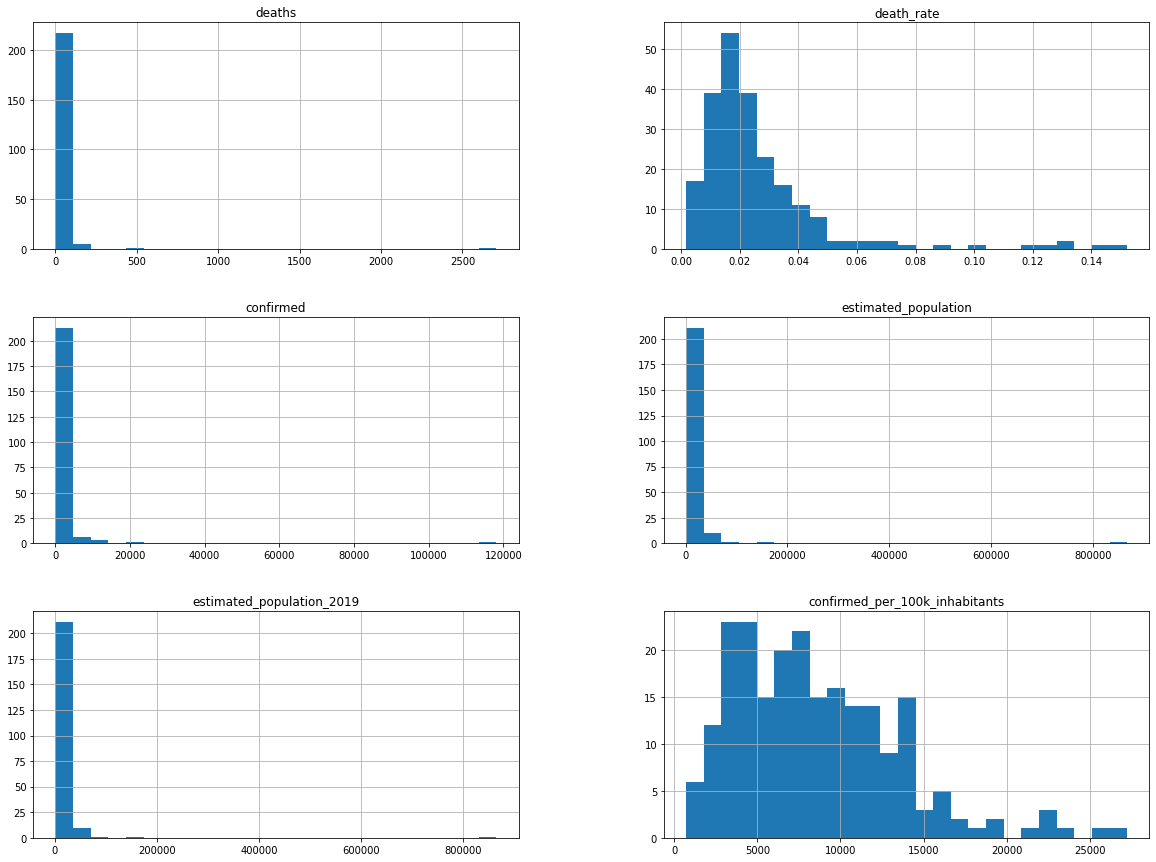

In [21]:
dataPiaui.hist(['deaths', 'death_rate', 'confirmed', 'estimated_population', 'estimated_population_2019', 'confirmed_per_100k_inhabitants'], bins=25, figsize=(20,15))
plt.show()


## Ponto #6

Capturar as latitudes e longitudes para cada 1 dos municípios presentes na base de dados e adicionar as colunas latitude e longitude nos dados

In [ ]:
latitudes = []
longitudes = []

for city in dataPiaui['city']:
    request = 'https://nominatim.openstreetmap.org/search?city='+city+'&state=Piaui&format=json'
    response = requests.get(request)
    response_data = response.json()[0]
    
    latitude = float(response_data["lat"])
    longitude = float(response_data["lon"])
    latitudes.append(latitude)
    longitudes.append(longitude)


In [ ]:
len(latitudes)
len(longitudes)

In [ ]:
dataPiaui['latitude'] = latitudes
dataPiaui['longitude'] = longitudes


In [ ]:
dataPiaui.info()

## Ponto #7

Apresentar um gráfico da latitude x longitude, onde cada amostra será representada por um círculo e quanto maior o valor do campo estimated_population, maior o raio do círculo que representa aquela amostra. Já a cor representa a taxa de mortalidade (death_rate), quão maior esse índice, mais próximo do vermelho

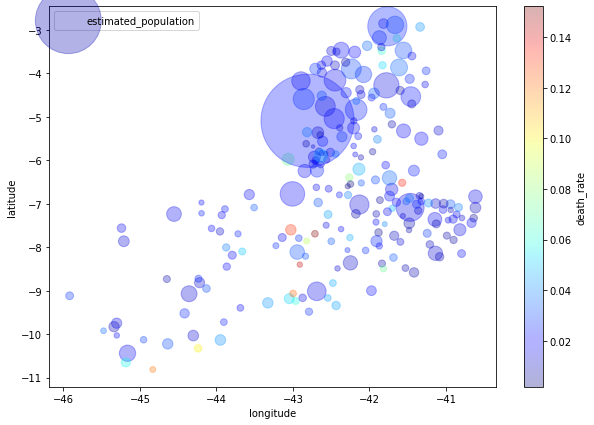

In [22]:
dataPiaui.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3,
    s=dataPiaui['estimated_population']/100, label='estimated_population', figsize=(10,7),
    c='death_rate', cmap=plt.get_cmap('jet'), colorbar=True,
    sharex=False)
plt.legend()

## Ponto #8

Calcular a matriz de correlação

In [23]:
matriz_correlacao = dataPiaui.corr()

In [24]:
matriz_correlacao

,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,latitude,longitude
confirmed,1.000000,0.996903,0.240628,NaN,0.996355,0.996353,0.106150,0.176921,-0.045062,0.114693,-0.015108
deaths,0.996903,1.000000,0.234341,NaN,0.997730,0.997734,0.106618,0.136432,-0.013607,0.116773,-0.015278
order_for_place,0.240628,0.234341,1.000000,NaN,0.246578,0.246476,0.020177,0.218542,-0.006783,0.207976,0.086809
is_last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
estimated_population_2019,0.996355,0.997730,0.246578,NaN,1.000000,1.000000,0.104996,0.125720,-0.026381,0.120086,-0.011558
estimated_population,0.996353,0.997734,0.246476,NaN,1.000000,1.000000,0.104970,0.125657,-0.026366,0.119995,-0.011612
city_ibge_code,0.106150,0.106618,0.020177,NaN,0.104996,0.104970,1.000000,-0.056907,0.108575,-0.064118,-0.007926
confirmed_per_100k_inhabitants,0.176921,0.136432,0.218542,NaN,0.125720,0.125657,-0.056907,1.000000,-0.484392,0.200604,-0.008849
death_rate,-0.045062,-0.013607,-0.006783,NaN,-0.026381,-0.026366,0.108575,-0.484392,1.000000,-0.164531,-0.157423
latitude,0.114693,0.116773,0.207976,NaN,0.120086,0.119995,-0.064118,0.200604,-0.164531,1.000000,0.431681


## Ponto #9

Verificar a correlação entre o atributo death_rate e os demais atributos não categóricos

In [25]:
matriz_correlacao['death_rate'].sort_values(ascending=False)

death_rate                        1.000000
city_ibge_code                    0.108575
order_for_place                  -0.006783
deaths                           -0.013607
estimated_population             -0.026366
estimated_population_2019        -0.026381
confirmed                        -0.045062
longitude                        -0.157423
latitude                         -0.164531
confirmed_per_100k_inhabitants   -0.484392
is_last                                NaN
Name: death_rate, dtype: float64